In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [110]:
titanicDf = pd.read_csv('./Titanic-Dataset.csv')
titanicDf.drop('PassengerId', axis=1, inplace=True)
titanicDf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
# sns.relplot(data=titanicDf, x="Sex", y="Age", hue="Survived")

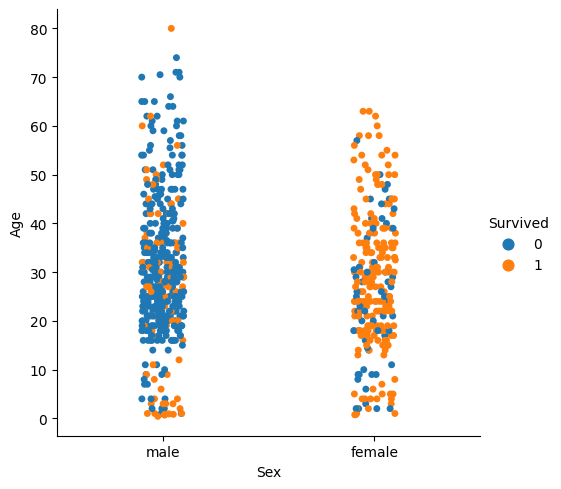

In [112]:
sns.catplot(data=titanicDf, x="Sex", y="Age", hue="Survived")
plt.show()

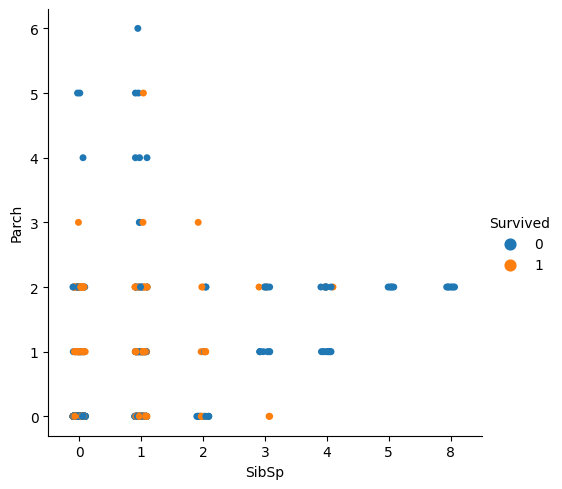

In [113]:
sns.catplot(data=titanicDf, x="SibSp", y="Parch", hue="Survived")
plt.show()

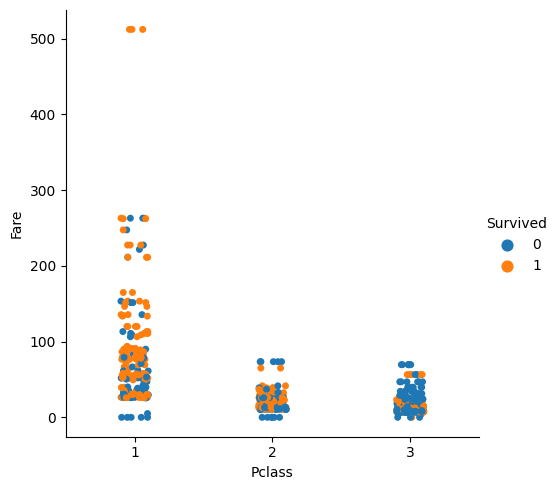

In [114]:
sns.catplot(data=titanicDf, x="Pclass", y="Fare", hue="Survived")
plt.show()

In [115]:
newDf = titanicDf[['Pclass','Sex','Age','Fare']]
newDf.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [116]:
sexDF = pd.get_dummies(newDf.Sex)
newDf.drop('Sex', axis="columns", inplace=True)
formattedDF = newDf.join(sexDF)
formattedDF.head()

/tmp/ipykernel_1944/2136305757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf.drop('Sex', axis="columns", inplace=True)


,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [117]:
formattedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   Fare    891 non-null    float64
 3   female  891 non-null    uint8  
 4   male    891 non-null    uint8  
dtypes: float64(2), int64(1), uint8(2)
memory usage: 22.7 KB


In [118]:
filledDf = formattedDF.fillna(method="ffill")
filledDf

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,19.0,23.4500,1,0
889,1,26.0,30.0000,0,1


In [119]:
targetResults = titanicDf[["Survived"]]
targetResults.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [120]:
data_train, data_test, results_train, results_test = train_test_split(filledDf, targetResults,test_size=0.2)

In [121]:
tree = DecisionTreeClassifier()
tree.fit(data_train, results_train)

DecisionTreeClassifier()

In [122]:
tree.score(data_test, results_test)

0.7318435754189944

In [123]:
# Passageiros
passengers = pd.DataFrame(data={
  "Pclass": [ 2,  3,   1,   1], # classe
  "Age":    [22, 21,  60,  52], # idade
  "Fare":   [30, 15, 100, 100], # taxa paga
  "female": [ 0,  1,   0,   1], # mulher? 1: sim, 0: não
  "male":   [ 1,  0,   1,   0], # homem? 1: sim, 0: não
})
passengers

,Pclass,Age,Fare,female,male
0,2,22,30,0,1
1,3,21,15,1,0
2,1,60,100,0,1
3,1,52,100,1,0


In [124]:
tree.predict(passengers)

array([0, 0, 0, 1])

In [138]:
# TESTANDO SVM
from sklearn import svm 

svmModel = svm.SVC()
svmModel.fit(data_train, results_train.Survived.to_list())
svmModel.score(data_test, results_test.Survived.to_list())

0.6480446927374302

In [139]:
svmModel.predict(passengers)

array([0, 0, 1, 1])